<a href="https://colab.research.google.com/github/vyolete/SystemRecomendations/blob/main/KmeansBookRecomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install chart_studio

In [3]:
pip install plotly


In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import gdown

In [5]:
# este codigo Solo en Colab
try:
    import google.colab
    !pip install -q gdown
except:
    pass

In [6]:
# Descargar archivos CSV desde Google Drive
id_DataSetFinal = '1bdvTc5K6m_E0ZH5KlW8FqUgNTIv6t79z'


gdown.download(f'https://drive.google.com/uc?id={id_DataSetFinal}', 'data.csv', quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1bdvTc5K6m_E0ZH5KlW8FqUgNTIv6t79z
From (redirected): https://drive.google.com/uc?id=1bdvTc5K6m_E0ZH5KlW8FqUgNTIv6t79z&confirm=t&uuid=6d0bca11-4d1d-4574-80ca-a791ec8d14ae
To: /content/data.csv
100%|██████████| 126M/126M [00:01<00:00, 125MB/s]


'data.csv'

In [7]:
# Cargar data para IOS

# Changed error_bad_lines to on_bad_lines
data=pd.read_csv('/content/data.csv', sep=',', on_bad_lines='skip')
data=pd.DataFrame(data)
# Convertir columnas de dataframe en listas
data.columns.tolist()
data.index.tolist()

print (type(data.columns.tolist()))
print (type(data.index.tolist()))

print ('Data read into a pandas dataframe!')
data.shape

<class 'list'>
<class 'list'>
Data read into a pandas dataframe!


(1031134, 9)

In [8]:
#Ver los datos
data.head()

,User-ID,Age,Book-Rating,Year-Of-Publication,Book-Author,Book-Title,ISBN,Location,Publisher
0,276725,32.0,0,2002,M. J. Rose,Flesh Tones: A Novel,034545104X,"tyler, texas, usa",Ballantine Books
1,276726,32.0,5,2001,Judith Rae,Rites of Passage,0155061224,"seattle, washington, usa",Heinle
2,276727,16.0,0,1996,Nicholas Sparks,The Notebook,0446520802,"h, new south wales, australia",Warner Books
3,276729,16.0,3,1999,Philip Prowse,Help!: Level 1,052165615X,"rijeka, n/a, croatia",Cambridge University Press
4,276729,16.0,6,2001,Sue Leather,The Amsterdam Connection : Level 4 (Cambridge ...,0521795028,"rijeka, n/a, croatia",Cambridge University Press


In [9]:
#Ver columnas del data frame
data.columns

Index(['User-ID', 'Age', 'Book-Rating', 'Year-Of-Publication', 'Book-Author',
       'Book-Title', 'ISBN', 'Location', 'Publisher'],
      dtype='object')

In [10]:
#Descripcion de los datos
data.describe()

,User-ID,Age,Book-Rating,Year-Of-Publication
count,1.031134e+06,1.031134e+06,1.031134e+06,1.031134e+06
mean,1.405946e+05,3.568465e+01,2.839039e+00,1.968187e+03
std,8.052469e+04,1.056842e+01,3.854151e+00,2.311338e+02
min,2.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00
25%,7.041500e+04,3.100000e+01,0.000000e+00,1.992000e+03
50%,1.412100e+05,3.200000e+01,0.000000e+00,1.997000e+03
75%,2.114260e+05,4.100000e+01,7.000000e+00,2.001000e+03
max,2.788540e+05,1.000000e+02,1.000000e+01,2.050000e+03


In [11]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Suponemos que ya tienes el DataFrame `data`
# Seleccionamos columnas relevantes
data_standar = data[['User-ID', 'Age', 'Book-Rating', 'Year-Of-Publication']].copy()

# Asegurarse de que las columnas sean numéricas
for col in ['Age', 'Book-Rating', 'Year-Of-Publication']:
    data_standar[col] = pd.to_numeric(data_standar[col], errors='coerce')

# Eliminar filas con valores nulos
data_standar.dropna(subset=['Age', 'Book-Rating', 'Year-Of-Publication'], inplace=True)

# Normalizar características numéricas
scaler = StandardScaler()
data_normalizadas = scaler.fit_transform(data_standar[['Age', 'Book-Rating', 'Year-Of-Publication']])


In [12]:
# Reducir dataset si es muy grande
if len(data_standar) > 10000:
    data_standar = data_standar.sample(n=5000, random_state=42)


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Inicializar listas para almacenar resultados
inercia = []
silhouette = []
k_range = range(2, 11)

# Usamos tqdm para ver el progreso
for k in tqdm(k_range, desc="Calculando KMeans"):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_standar)
    inercia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(data_standar, kmeans.labels_))


Calculando KMeans:   0%|          | 0/9 [00:00<?, ?it/s]

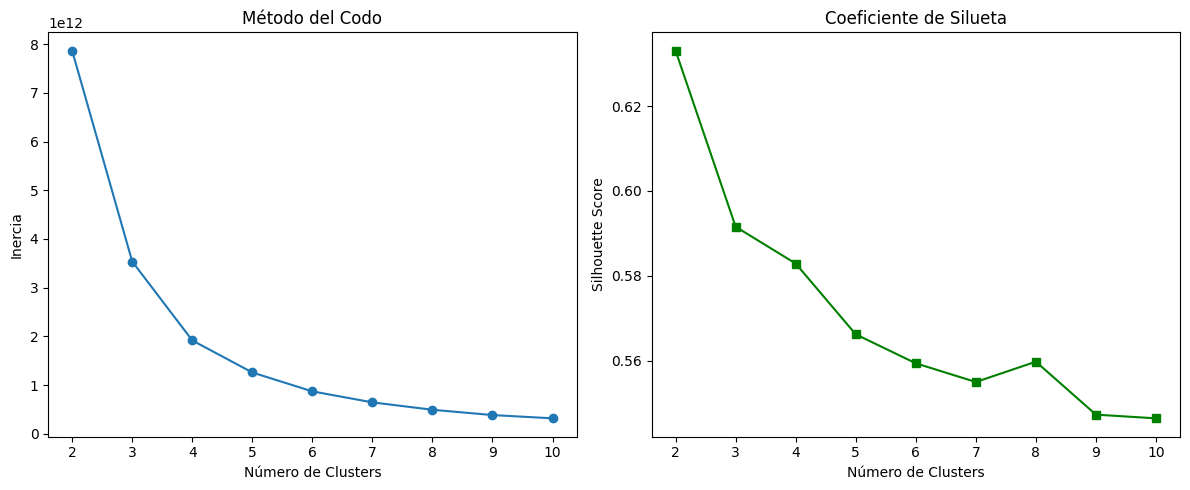

In [14]:
# Gráficas: Método del codo y Silhouette Score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inercia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette, marker='s', color='green')
plt.title('Coeficiente de Silueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


##Entrenar modelo KMeans con k=4

In [17]:
from sklearn.cluster import KMeans

# This cell fits the KMeans model and adds the 'Cluster' column to data_standar
from sklearn.cluster import KMeans

# Entrenamos el modelo con 4 clusters
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_final.fit(data_standar)

# Agregamos la columna de cluster al DataFrame original
data_standar['Cluster'] = kmeans_final.labels_

###Visualizar distribución de usuarios por clúster

<ipython-input-18-2408172471>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=data_standar, palette='Set2')


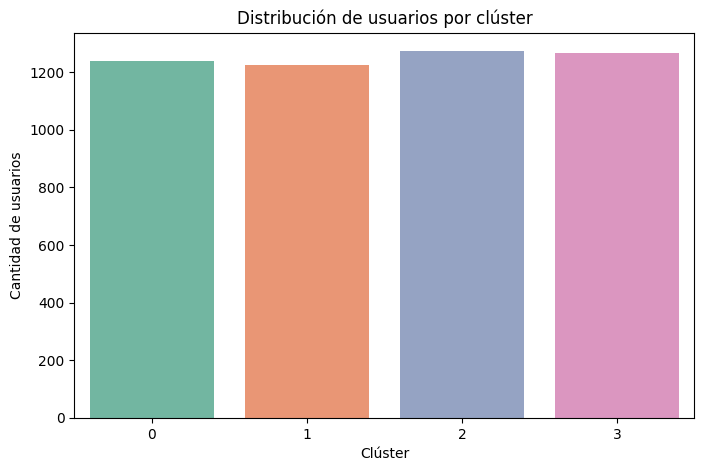

In [18]:
# This cell plots the count of clusters using the updated data_standar DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=data_standar, palette='Set2')
plt.title('Distribución de usuarios por clúster')
plt.xlabel('Clúster')
plt.ylabel('Cantidad de usuarios')
plt.show()


In [24]:
import plotly.express as px
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# 📌 KMeans - Visualización de Clusters

# Nota: El modelo kmeans_final ya fue entrenado anteriormente sobre 'data_standar'.
# Por lo tanto, podemos reutilizar el objeto entrenado y sus etiquetas (labels).
# Si deseas volver a entrenar KMeans, asegúrate de hacerlo sobre 'data_standar'.

# Usamos las etiquetas del modelo previamente entrenado
labels = kmeans_final.labels_

# Creamos un DataFrame para graficar los clusters
# Seleccionamos solo las columnas utilizadas para el clustering y renombramos para visualización
df_plot = data_standar[['Age', 'Book-Rating', 'Year-Of-Publication']].copy()
df_plot.columns = ['Edad', 'Puntaje', 'Año']  # Renombramos para claridad en los ejes del gráfico
df_plot['Cluster'] = labels.astype(str)  # Convertimos a string para colorear por categoría

# 📊 Gráfico 3D interactivo con Plotly
import plotly.express as px

fig = px.scatter_3d(
    df_plot,
    x='Edad', y='Puntaje', z='Año',
    color='Cluster',
    title='Clusters de libros según Edad, Puntaje y Año',
    opacity=0.6
)

# Configuramos el tamaño de los puntos
fig.update_traces(marker=dict(size=5))

# Mostramos el gráfico interactivo
fig.show()

# ✅ Agregamos la columna de clúster también a 'data_standar' para análisis posteriores
# Esta línea puede ser redundante si ya se añadió antes, pero asegura consistencia
data_standar['Cluster'] = kmeans.labels_

# 🧠 Análisis: Promedio de variables numéricas por cluster
# Agrupamos por clúster y calculamos la media para entender el perfil de cada grupo
print(data_standar.groupby('Cluster')[['Age', 'Book-Rating', 'Year-Of-Publication']].mean(numeric_only=True))


               Age  Book-Rating  Year-Of-Publication
Cluster                                             
0        35.545675     3.004042          1961.946645
1        34.522449     2.520000          1962.688980
2        35.856245     2.859387          1960.677926
3        37.003953     2.914625          1981.127273


In [23]:
# Guardar como HTML interactivo
fig.write_html("Kmeans.html")